In [1]:
#Sul DB Titanic effettuiamo le seguenti analisi : #
# 1. Quanti ponti c'erano sulla nave  #
# 2. Visualizzare un grafico con il numero di passeggeri di ogni classe di imbarco #
# 3. Qual'era la distribuzione delle tariffe #
# 4. Riusciamo a vedere la distribuzione delle età dei passeggeri rispetto alla classe di imbarco ? #
#    Proviamo con un boxplot e con un ViolinPlot  #
# 5. Visualizziamo un boxplot riseptto alle colonne fare e survived; che cosa ne deduciamo ?  #

In [2]:
# 1. Quanti ponti c'erano sulla nave  #

In [3]:
import os
import dotenv
import sqlalchemy
import pandas as pd
from sqlalchemy import create_engine
dotenv.load_dotenv(override=True, dotenv_path="C:/Users/Giuseppe/OneDrive/Desktop/DATA ANALYST/3_PYTHON/titanic.env")
username = os.getenv("username")
password = os.getenv("password")
host = os.getenv("host")
dbname = os.getenv("dbname")
conn_string = "mysql+pymysql://" + username + ":" + password + "@" + host + "/" + dbname
db_engine = sqlalchemy.create_engine(conn_string)
query = "SELECT * FROM titanic"
tit=pd.read_sql(query, db_engine)

In [4]:
tit

,PassengerId,PClass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,EmbarkDate
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,,S,0,10-4-1912
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C,1,11-4-1912
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.93,,S,1,10-4-1912
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S,1,10-4-1912
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,,S,0,10-4-1912
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,0.0,0,0,A.5. 3236,8.05,,S,0,10-4-1912
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.90,C105,C,1,11-4-1912
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.25,,S,0,10-4-1912
1307,1308,3,"Ware, Mr. Frederick",male,0.0,0,0,359309,8.05,,S,0,10-4-1912


In [5]:
tit.info() #Non c'è l'informazione sui ponti della nave#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   PClass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Cabin        1309 non-null   object 
 10  Embarked     1309 non-null   object 
 11  Survived     1309 non-null   int64  
 12  EmbarkDate   1309 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 133.1+ KB


In [6]:
import seaborn as sns

In [7]:
titan=sns.load_dataset('titanic')

In [8]:
titan.loc[:,['deck']].value_counts(dropna=False)

deck
nan     688
C        59
B        47
D        33
E        32
A        15
F        13
G         4
Name: count, dtype: int64

In [9]:
# 2. Visualizzare un grafico con il numero di passeggeri di ogni classe di imbarco #

In [10]:
x=tit.PClass.value_counts()

In [11]:
x=x[[1,2,3,]]
x

PClass
1    323
2    277
3    709
Name: count, dtype: int64

<Axes: title={'center': 'Numero di Passeggeri per classe'}, xlabel='PClass'>

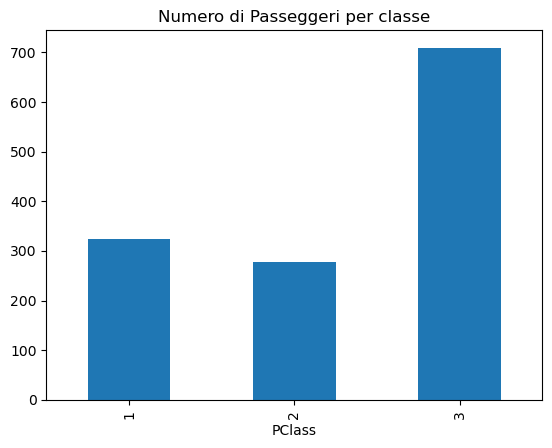

In [12]:
x.plot(kind='bar', title=('Numero di Passeggeri per classe'))

In [13]:
# 3. Qual'era la distribuzione delle tariffe #

<Axes: title={'center': 'Distribuzione delle tariffe in Sterline'}, ylabel='Frequency'>

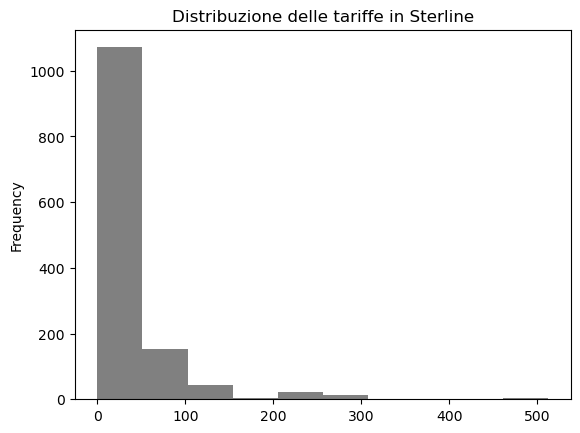

In [14]:
tit.Fare.plot(kind='hist', color='grey', title=('Distribuzione delle tariffe in Sterline'))

In [15]:
# 4. Riusciamo a vedere la distribuzione delle età dei passeggeri rispetto alla classe di imbarco ? #

In [16]:
import seaborn as sns

<Axes: xlabel='PClass', ylabel='Age'>

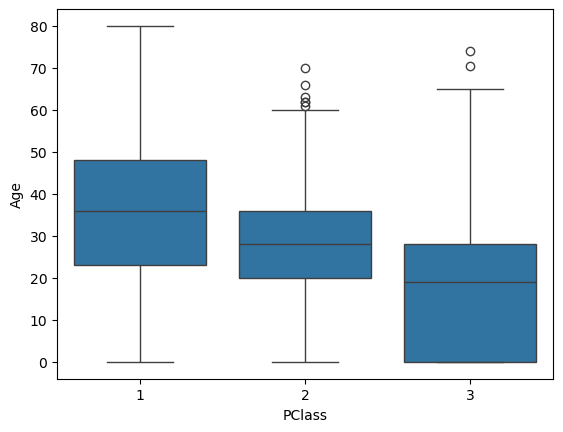

In [17]:
sns.boxplot(data=tit, x='PClass', y='Age') #La popolazione della terza classe aveva un'età media molto più bassa #

<Axes: xlabel='PClass', ylabel='Age'>

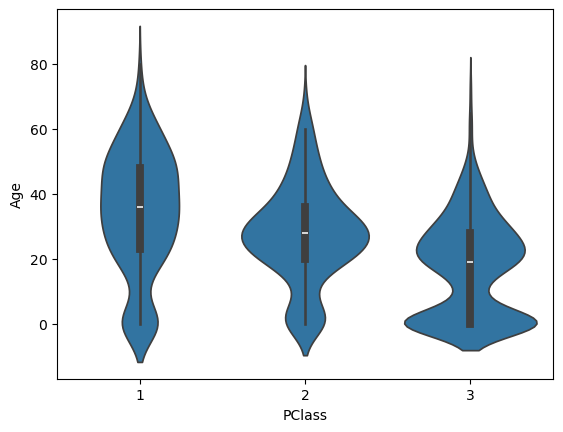

In [18]:
sns.violinplot(data=tit, x='PClass', y='Age')

In [19]:
# 5. Visualizziamo un boxplot riseptto alle colonne fare e survived; che cosa ne deduciamo ?  #

<Axes: xlabel='Survived', ylabel='Fare'>

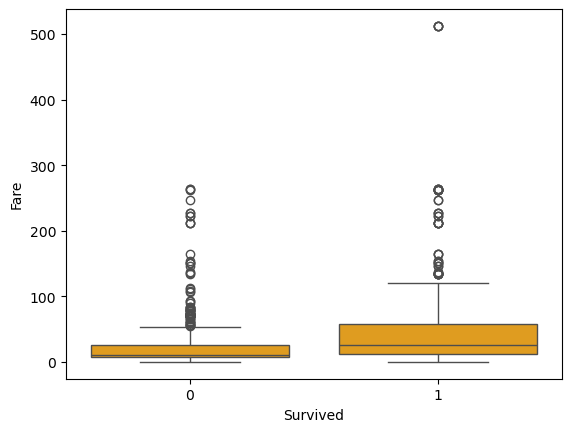

In [20]:
sns.boxplot(data=tit, x='Survived', y='Fare', color='Orange')

In [21]:
# La Mediana nella categoria sopravvissuti si riferisce ad un prezzo biglietto più altro rispetto a quello della#
# Mediana dei morti ...In sostanza si può dedurre che chi ha pagato un biglietto più caro ha avuto più possibilità di #
#mettersi in salvo ... C'è nella categoria Sopravissuti un outlier che si riferisce al prezzo max pagato ... #

In [22]:
filepath = "C:/Users/Giuseppe/3_PYTHON/FILE_ESERC_CSV/stockdata.csv"
stock = pd.read_csv(filepath, sep=',')

In [23]:
#Esercizio 2 - Scarichiamo il dataset stockdata.csv  :   #
# 1. Visualizziamo l'andamento delle azioni AAPL   #
# 2. Visualizziamo l'andamento di tutte le azioni del Dataset  #
# 3. Visualizziamo l'andamento di Microsoft e IBM nel 2012 e 2013  #
# 4. Con un Istogramma, troviamo il range di valori che le azioni di Microsoft hanno assunto più spesso #

In [24]:
stock

,MSFT,IBM,SBUX,AAPL,GSPC,Date
0,23.950705,80.517962,16.149666,11.086612,1416.599976,2007-01-03
1,23.910599,81.378851,16.167992,11.332687,1418.339966,2007-01-04
2,23.774242,80.642129,16.099269,11.251984,1409.709961,2007-01-05
3,24.006852,81.867244,16.039710,11.307550,1412.839966,2007-01-08
4,24.030914,82.835742,15.970989,12.246870,1412.109985,2007-01-09
...,...,...,...,...,...,...
2301,51.360001,132.800003,58.110001,96.099998,1929.800049,2016-02-24
2302,52.099998,134.500000,58.750000,96.760002,1951.699951,2016-02-25
2303,51.299999,132.029999,58.340000,96.910004,1948.050049,2016-02-26
2304,50.880001,131.029999,58.209999,96.690002,1932.229980,2016-02-29


In [25]:
# 1. Visualizziamo l'andamento delle azioni AAPL   #

<Axes: xlabel='Date'>

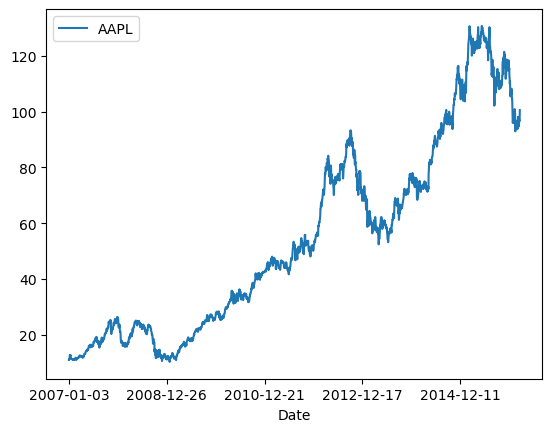

In [26]:
stock=stock.set_index('Date')
stock.loc[:,['AAPL']].plot()

In [27]:
stock.describe()

,MSFT,IBM,SBUX,AAPL,GSPC
count,2306.000000,2306.000000,2306.000000,2306.000000,2306.000000
mean,28.737785,136.239600,23.213089,54.719810,1459.999869
std,9.471737,37.376360,15.522634,34.645282,361.673516
min,12.630211,61.274273,3.284911,10.345740,676.530029
25%,22.582537,102.407469,10.792787,22.929971,1198.417481
50%,24.990737,143.833125,17.896952,49.327484,1402.370056
75%,33.873379,172.566340,35.305682,78.102594,1770.579986
max,56.146870,198.948796,63.098822,130.671320,2130.820068


<Axes: xlabel='Date'>

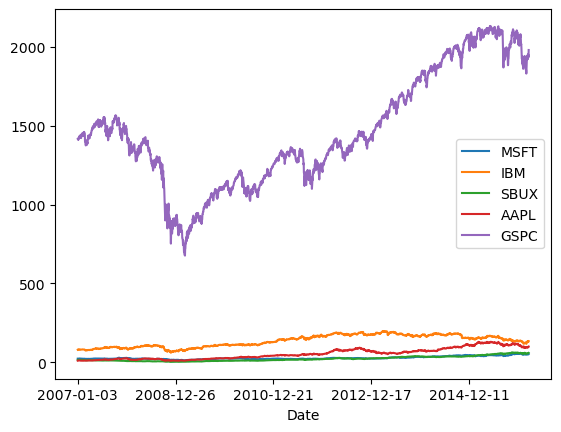

In [28]:
stock.plot()

In [29]:
filepath = "C:/Users/Giuseppe/3_PYTHON/FILE_ESERC_CSV/stockdata.csv"
stock = pd.read_csv(filepath, sep=',')

In [30]:
stock.Date=pd.to_datetime(stock.Date)
stock

,MSFT,IBM,SBUX,AAPL,GSPC,Date
0,23.950705,80.517962,16.149666,11.086612,1416.599976,2007-01-03
1,23.910599,81.378851,16.167992,11.332687,1418.339966,2007-01-04
2,23.774242,80.642129,16.099269,11.251984,1409.709961,2007-01-05
3,24.006852,81.867244,16.039710,11.307550,1412.839966,2007-01-08
4,24.030914,82.835742,15.970989,12.246870,1412.109985,2007-01-09
...,...,...,...,...,...,...
2301,51.360001,132.800003,58.110001,96.099998,1929.800049,2016-02-24
2302,52.099998,134.500000,58.750000,96.760002,1951.699951,2016-02-25
2303,51.299999,132.029999,58.340000,96.910004,1948.050049,2016-02-26
2304,50.880001,131.029999,58.209999,96.690002,1932.229980,2016-02-29


In [31]:
fil_2012=stock.Date.dt.year==2012
fil_2013=stock.Date.dt.year==2013
filtro_Year=fil_2012|fil_2013
stock=stock.loc[filtro_Year,['Date','MSFT','IBM']]
stock_ind=stock.set_index('Date')
stock_ind

,MSFT,IBM
Date,,
2012-01-03,23.773104,168.200853
2012-01-04,24.332575,167.514678
2012-01-05,24.581230,166.720180
2012-01-06,24.963092,164.806130
2012-01-09,24.634512,163.948426
...,...,...
2013-12-24,34.884738,171.468856
2013-12-26,35.223422,173.462249
2013-12-27,35.082304,173.209562


<Axes: xlabel='Date'>

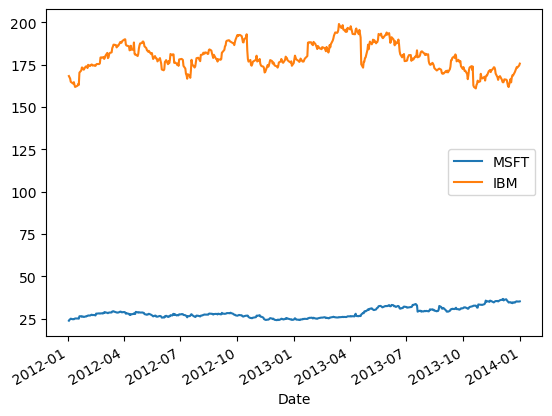

In [32]:
stock_ind.plot()

<Axes: ylabel='Frequency'>

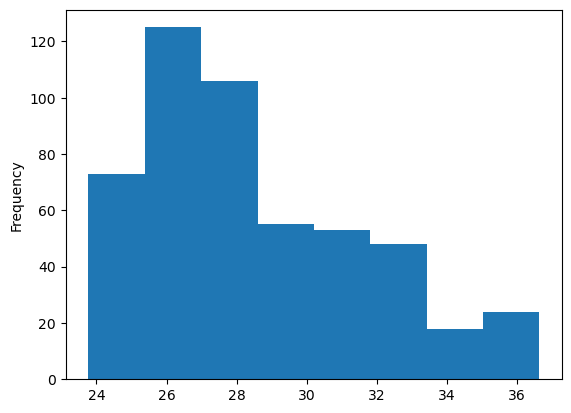

In [33]:
stock.MSFT.plot(kind='hist', bins=8)

In [34]:
#Scarichiamo il dataset metal_bands_2017.csv da ... #
#1.Con Seaborn visualizziamo l'istogramma del numero dei fan delle varie band; cosa si vede ? Cosa ne deduciamo?

In [38]:
filepath = ("C:/Users/Giuseppe/3_PYTHON/FILE_ESERC_CSV/metal_bands_2017.csv")
met = pd.read_csv(filepath, encoding='latin1', index_col=(0))

In [39]:
import seaborn as sns

In [40]:
met

,band_name,fans,formed,origin,split,style
0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash"
3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
4,Amon Amarth,3054,1988,Sweden,-,Melodic death
...,...,...,...,...,...,...
4995,Atara,0,2006,France,2006,"Black,Grindcore"
4996,Avicularia,0,2003,Croatia,-,Avantgarde death
4997,Awake,0,2006,United Kingdom,2006,"Heavy,Progressive"
4998,Axatak,0,1983,Australia,1988,"Hard rock,Heavy"


In [41]:
# - Visualizziamo con Seaborn l'istogramma del numero dei fan delle varie band; Cosa si vede ? Cosa ne deducizmo? #

<Axes: xlabel='fans', ylabel='Count'>

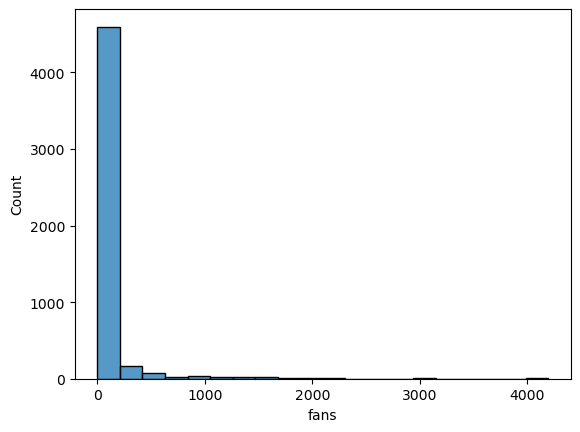

In [42]:
sns.histplot(data=met, x='fans', bins=20)

In [43]:
# Delle band che suonano sia Progressive che Thrash, realizziamo un barplot che mostri quanti fan ci sono in totale rispetto al paese di origine (nota in #
# questo caso specifico, per accedere alla colonna 'style' dovremmo usare ['style'] e non .style perchè quest'ultimo è un metodo)#

In [44]:
fil_tr=met['style'].str.contains('thrash', case=False)

In [45]:
fil_pr=met['style'].str.contains('progressive', case=False)

In [46]:
met_tp=met.loc[fil_tr & fil_pr]

<Axes: ylabel='origin'>

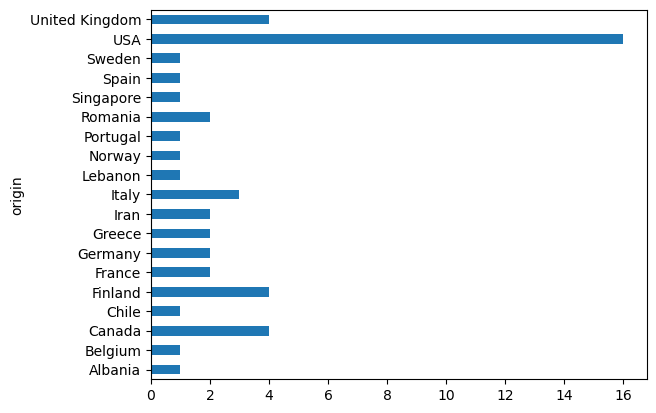

In [47]:
met_tp.groupby('origin')['fans'].count().plot(kind='barh')

In [48]:
#Visualizziamo un istogramma delle date di formazione delle band (potremo dover convertire in qualche modo questo dato); si nota qualche tren?#

In [49]:
#Dobbiamo trasformare la colonna 'origin' da object a int  # 

In [50]:
#Dovremmo farlo con astype(int) ... ma restituisce un errore perchè ci sono valori nulli impliciti ... (-)  .. eliminiamoli ..#

In [51]:
filt_n = met.formed != "-"
met_n_nul=met.loc[filt_n]

<Axes: ylabel='Frequency'>

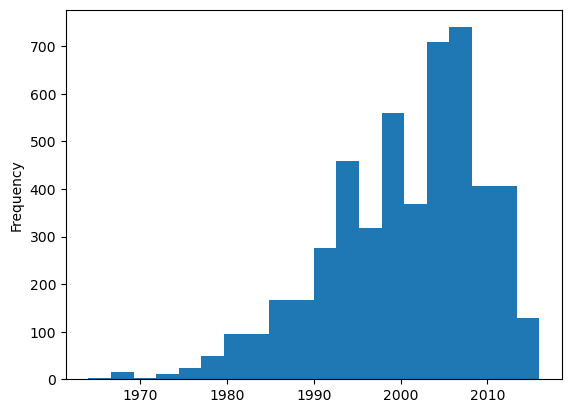

In [52]:
met_n_nul.formed.astype(int).plot(kind="hist", bins=20)

In [55]:
filepath = ("C:/Users/Giuseppe/3_PYTHON/FILE_ESERC_CSV/election.csv")
ele = pd.read_csv(filepath)

In [56]:
ele

,district,Coderre,Bergeron,Joly,total,winner,result,district_id
0,101-Bois-de-Liesse,2481,1829,3024,7334,Joly,plurality,101
1,102-Cap-Saint-Jacques,2525,1163,2675,6363,Joly,plurality,102
2,11-Sault-au-Récollet,3348,2770,2532,8650,Coderre,plurality,11
3,111-Mile-End,1734,4782,2514,9030,Bergeron,majority,111
4,112-DeLorimier,1770,5933,3044,10747,Bergeron,majority,112
5,113-Jeanne-Mance,1455,3599,2316,7370,Bergeron,plurality,113
6,12-Saint-Sulpice,3252,2521,2543,8316,Coderre,plurality,12
7,121-La Pointe-aux-Prairies,5456,1760,3330,10546,Coderre,majority,121
8,122-Pointe-aux-Trembles,4734,1879,2852,9465,Coderre,majority,122
9,123-Rivière-des-Prairies,5737,958,1656,8351,Coderre,majority,123


<Axes: >

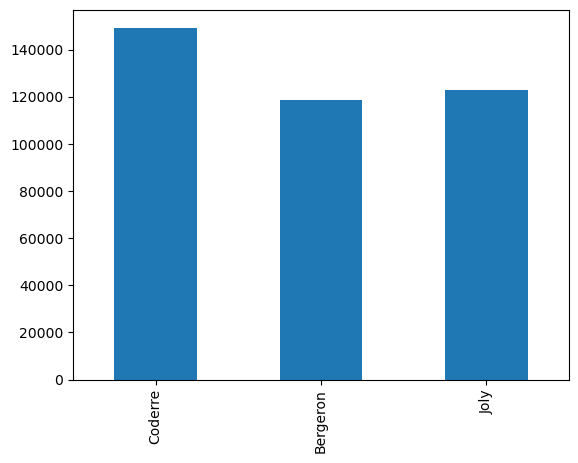

In [57]:
ele.loc[:,['Coderre','Bergeron','Joly']].sum().plot(kind="bar") #Questo grafico mi dà la somma totale dei voti per candidato #

<Axes: ylabel='district'>

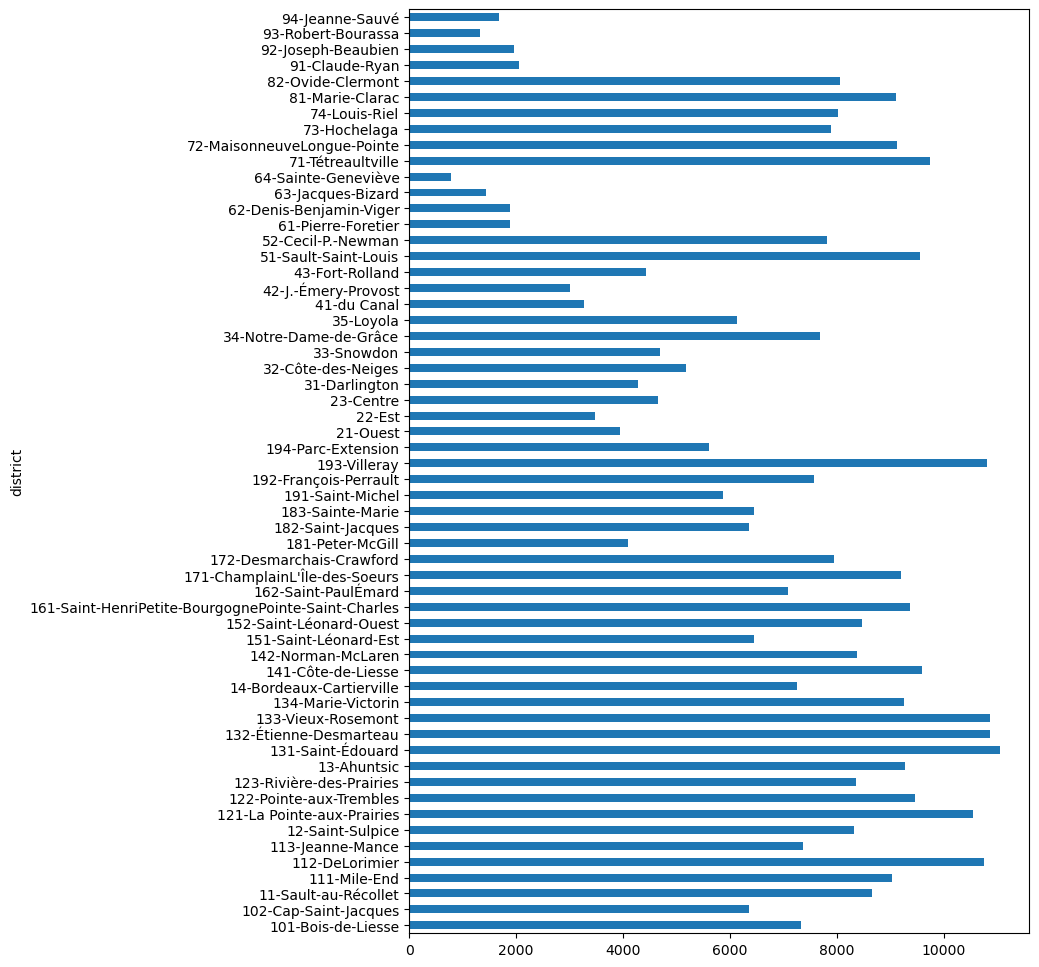

In [58]:
ele_ind=ele.set_index('district')
ele_ind.total.plot(kind='barh', figsize=(8,12))#Metto ad indice il nome del distretto per averlo sull'asse delle y e sistemo le dimensioni#

<Axes: ylabel='district'>

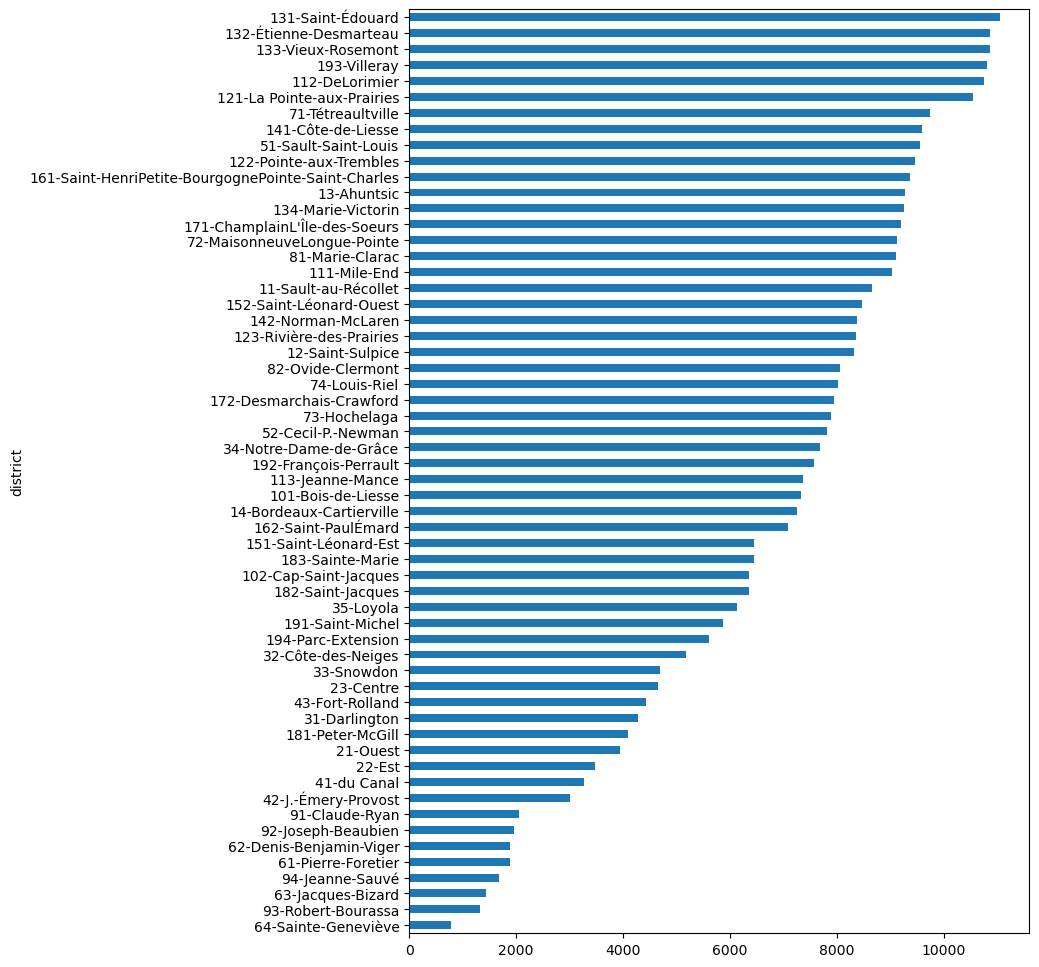

In [59]:
ele_ind.sort_values('total').total.plot(kind='barh', figsize=(8,12))     #Mi ordino i valori per avere il grafico a barre di n. decrescente #

In [60]:
#Visualizzare un grafico a barre comparativo dove si confrontano i voti presi nei primi 4 distretti per ogni candidato #

In [61]:
ele_ind

,Coderre,Bergeron,Joly,total,winner,result,district_id
district,,,,,,,
101-Bois-de-Liesse,2481,1829,3024,7334,Joly,plurality,101
102-Cap-Saint-Jacques,2525,1163,2675,6363,Joly,plurality,102
11-Sault-au-Récollet,3348,2770,2532,8650,Coderre,plurality,11
111-Mile-End,1734,4782,2514,9030,Bergeron,majority,111
112-DeLorimier,1770,5933,3044,10747,Bergeron,majority,112
113-Jeanne-Mance,1455,3599,2316,7370,Bergeron,plurality,113
12-Saint-Sulpice,3252,2521,2543,8316,Coderre,plurality,12
121-La Pointe-aux-Prairies,5456,1760,3330,10546,Coderre,majority,121
122-Pointe-aux-Trembles,4734,1879,2852,9465,Coderre,majority,122


In [62]:
ele_dist_4=ele_ind.iloc[:4,:3]  #con i.loc mi prendo le prime 4 righe  e le prime 4 colonne (indice + voti dei candidati) #

<Axes: ylabel='district'>

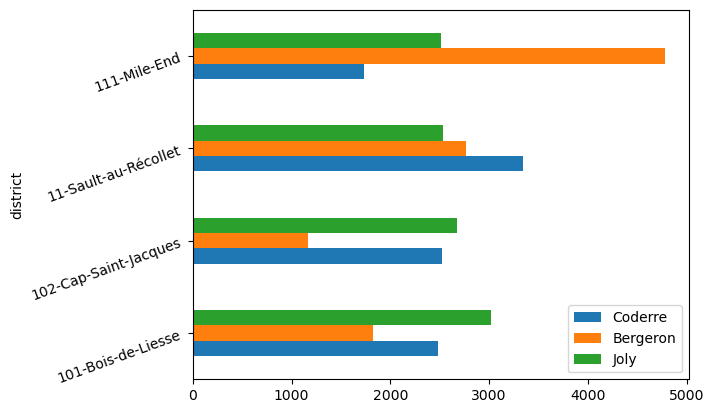

In [63]:
ele_dist_4.plot(kind='barh', rot=20) #Per ogni distretto ho un grafico che mi confronta i voti presi dai candidati

In [64]:
#Scarichiamo il file party_in_nyc.csv  ...#

In [67]:
import seaborn as sns
filepath = ("C:/Users/Giuseppe/3_PYTHON/FILE_ESERC_CSV/party_in_nyc.csv")
par_city = pd.read_csv(filepath)

In [68]:
par_city

,Created Date,Closed Date,Location Type,Incident Zip,City,Borough,Latitude,Longitude
0,2015-12-31 00:01:15,2015-12-31 03:48:04,Store/Commercial,10034.0,NEW YORK,MANHATTAN,40.866183,-73.918930
1,2015-12-31 00:02:48,2015-12-31 04:36:13,Store/Commercial,10040.0,NEW YORK,MANHATTAN,40.859324,-73.931237
2,2015-12-31 00:03:25,2015-12-31 00:40:15,Residential Building/House,10026.0,NEW YORK,MANHATTAN,40.799415,-73.953371
3,2015-12-31 00:03:26,2015-12-31 01:53:38,Residential Building/House,11231.0,BROOKLYN,BROOKLYN,40.678285,-73.994668
4,2015-12-31 00:05:10,2015-12-31 03:49:10,Residential Building/House,10033.0,NEW YORK,MANHATTAN,40.850304,-73.938516
...,...,...,...,...,...,...,...,...
225409,2016-12-31 23:53:57,2017-01-01 00:01:41,Store/Commercial,10003.0,NEW YORK,MANHATTAN,40.730073,-73.986585
225410,2016-12-31 23:55:01,2017-01-01 02:05:06,Residential Building/House,10032.0,NEW YORK,MANHATTAN,40.833144,-73.944617
225411,2016-12-31 23:56:20,2017-01-01 13:34:00,Residential Building/House,11104.0,SUNNYSIDE,QUEENS,40.743662,-73.923067
225412,2016-12-31 23:56:41,2017-01-01 03:49:12,Residential Building/House,10040.0,NEW YORK,MANHATTAN,40.858447,-73.929279


In [69]:
par_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225414 entries, 0 to 225413
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Created Date   225414 non-null  object 
 1   Closed Date    224619 non-null  object 
 2   Location Type  225414 non-null  object 
 3   Incident Zip   224424 non-null  float64
 4   City           224424 non-null  object 
 5   Borough        225414 non-null  object 
 6   Latitude       223946 non-null  float64
 7   Longitude      223946 non-null  float64
dtypes: float64(3), object(5)
memory usage: 13.8+ MB


In [70]:
par_city_gr=par_city.groupby('City')['Created Date'].count()

In [71]:
par_city_gr

City
ARVERNE                  510
ASTORIA                 3456
BAYSIDE                  232
BELLEROSE                160
BREEZY POINT               1
BRONX                  47673
BROOKLYN               68909
CAMBRIA HEIGHTS          171
CENTRAL PARK              48
COLLEGE POINT            529
CORONA                  2395
EAST ELMHURST           1258
ELMHURST                1260
FAR ROCKAWAY            1535
FLORAL PARK               13
FLUSHING                1761
FOREST HILLS             532
FRESH MEADOWS            613
GLEN OAKS                123
HOLLIS                   670
HOWARD BEACH             438
JACKSON HEIGHTS         1229
JAMAICA                 4041
KEW GARDENS              364
LITTLE NECK              131
LONG ISLAND CITY        1072
MASPETH                  409
MIDDLE VILLAGE           217
NEW HYDE PARK             11
NEW YORK               64112
OAKLAND GARDENS          113
OZONE PARK              1494
QUEENS                    24
QUEENS VILLAGE           954
REGO PARK

In [72]:
#Qual'è il rettangolo di latitudine e longitudine considerato nel dataset?

In [73]:
par_city.describe()

,Incident Zip,Latitude,Longitude
count,224424.000000,223946.000000,223946.000000
mean,10720.020992,40.749730,-73.924889
std,576.827879,0.082068,0.063779
min,83.000000,40.498820,-74.251277
25%,10039.000000,40.684648,-73.958245
50%,10469.000000,40.739170,-73.929713
75%,11225.000000,40.829273,-73.893299
max,11697.000000,40.912178,-73.702303


In [74]:
#Quante segnalazioni sono state fatte per case private? 

In [75]:
fil_r=par_city['Location Type'] =='Residential Building/House'
par_city_res=par_city[fil_r]

In [76]:
y=par_city_res['Created Date'].count()
print(f'Il numero di segnalazioni in Residential Building/House sono state : {y}')

Il numero di segnalazioni in Residential Building/House sono state : 146040


In [77]:
# Con Seaborn visualizziamo il conteggio delle segnalazioni avvenute in ogni quartiere; #
# che succede se aggiungiamo il parametro hue='Location Type'? #

<Axes: xlabel='Borough', ylabel='count'>

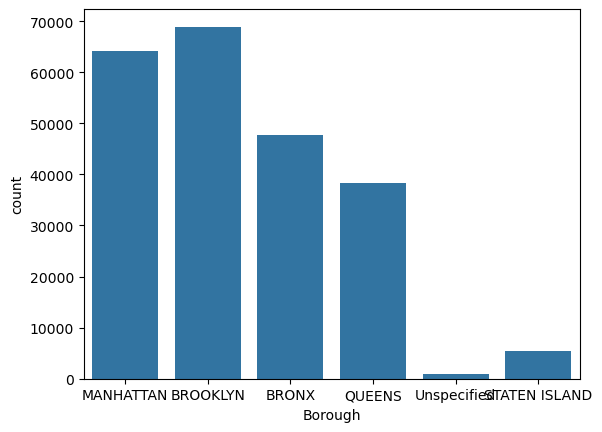

In [78]:
sns.countplot(data=par_city, x='Borough') # Qui vediamo una sola barra che rappresenta il quartiere #

<Axes: xlabel='Borough', ylabel='count'>

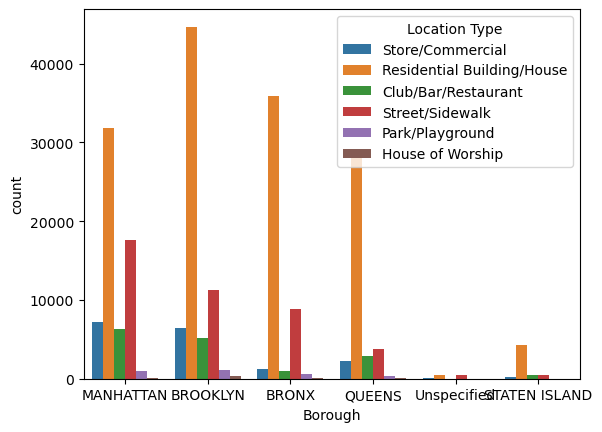

In [79]:
sns.countplot(data=par_city, x='Borough', hue='Location Type') # In tal caso vediamo un grafico tridimensionale ..#
                                        #ossia il numero delle segnalazioni per ogni quartiere e per ogni tipologia di luogo#